# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [413]:
#%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [414]:
#%pip install --upgrade plotly

### Import Statements

In [415]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [416]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [417]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [418]:
df_data.shape

(4324, 9)

In [419]:
df_data.sample(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2121,2121,2121,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Jul 25, 1985 21:00 UTC",Space Shuttle Challenger | STS-51-F,StatusRetired,450.0,Success
3521,3521,3521,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Fri Oct 17, 1969 11:45 UTC",Voskhod | Cosmos 302,StatusRetired,NaN,Success
549,549,549,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA","Sun Jul 13, 2014 16:52 UTC",Antares 120 | CRS Orb-2,StatusRetired,80.0,Success
2302,2302,2302,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Oct 30, 1982",Titan 34D | DSCS-II-15 + DSCS-III-A1,StatusRetired,NaN,Success
1288,1288,1288,Northrop,"SLC-576E, Vandenberg AFB, California, USA","Sat Oct 03, 1998 10:04 UTC",Minotaur C (Taurus) | STEX (NROL-8),StatusActive,45.0,Success
1516,1516,1516,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Tue Mar 28, 1995 11:19 UTC","Ariane 44LP | Brasilsat B2, Hot Bird 1",StatusRetired,NaN,Success
3109,3109,3109,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Fri Sep 21, 1973 13:05 UTC",Soyuz U | Cosmos 587,StatusRetired,NaN,Success
2327,2327,2327,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia","Thu Jun 10, 1982 17:37 UTC",Tsyklon-3 | Cosmos 1378,StatusRetired,NaN,Success
1290,1290,1290,Northrop,"Stargazer, Wallops Flight Facility, Virginia, USA","Wed Sep 23, 1998 05:06 UTC",Pegasus XL/HAPS | Orbcomm C1 - C8,StatusActive,40.0,Success
2367,2367,2367,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia","Thu Dec 03, 1981 11:47 UTC",Tsyklon-3 | Cosmos 1328,StatusRetired,NaN,Success


In [420]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [421]:
df_data['Price'] = df_data['Price'].str.replace(',', '')
df_data['Price'] = pd.to_numeric(df_data['Price'], downcast="float")

In [422]:
df_data['Date'] = df_data['Date'].str.replace('UTC', '')
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [423]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0.1    4324 non-null   int64         
 1   Unnamed: 0      4324 non-null   int64         
 2   Organisation    4324 non-null   object        
 3   Location        4324 non-null   object        
 4   Date            4324 non-null   datetime64[ns]
 5   Detail          4324 non-null   object        
 6   Rocket_Status   4324 non-null   object        
 7   Price           964 non-null    float32       
 8   Mission_Status  4324 non-null   object        
dtypes: datetime64[ns](1), float32(1), int64(2), object(5)
memory usage: 287.3+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [424]:
print(f'Any data duplicated? {df_data.duplicated().values.any()}')

Any data duplicated? False


In [425]:
df = pd.DataFrame(df_data)
df['Unnamed: 0.1'].equals(df['Unnamed: 0'])
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [426]:
df.shape

(4324, 7)

In [427]:
df.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1880,Arianespace,"ELA-1, Guiana Space Centre, French Guiana, France",1989-07-12 00:14:00,Ariane 3 | Olympus-1,StatusRetired,NaN,Success
2235,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1983-11-23 16:45:00,Molniya-M /Block ML | Molniya-1 n†­108,StatusRetired,NaN,Success
1683,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1992-08-10 23:04:00,"Ariane 42P | TOPEX/Poseidon, Oscar 23, S80/T",StatusRetired,NaN,Success
1298,CASC,"LC-7, Taiyuan Satellite Launch Center, China",1998-08-19 23:01:00,Long March 2C | Iridium 76 & 78,StatusActive,30.80,Success
3106,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1973-10-02 21:46:00,Cosmos-3M (11K65M) | Cosmos 588 to 595,StatusRetired,NaN,Success


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Location        4324 non-null   object        
 2   Date            4324 non-null   datetime64[ns]
 3   Detail          4324 non-null   object        
 4   Rocket_Status   4324 non-null   object        
 5   Price           964 non-null    float32       
 6   Mission_Status  4324 non-null   object        
dtypes: datetime64[ns](1), float32(1), object(5)
memory usage: 219.7+ KB


## Descriptive Statistics

In [429]:
df.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Who launched the most missions in any given year?

In [430]:
df.groupby("Organisation")["Location"].count().sort_values(ascending=False).head(1)

Organisation
RVSN USSR    1777
Name: Location, dtype: int64

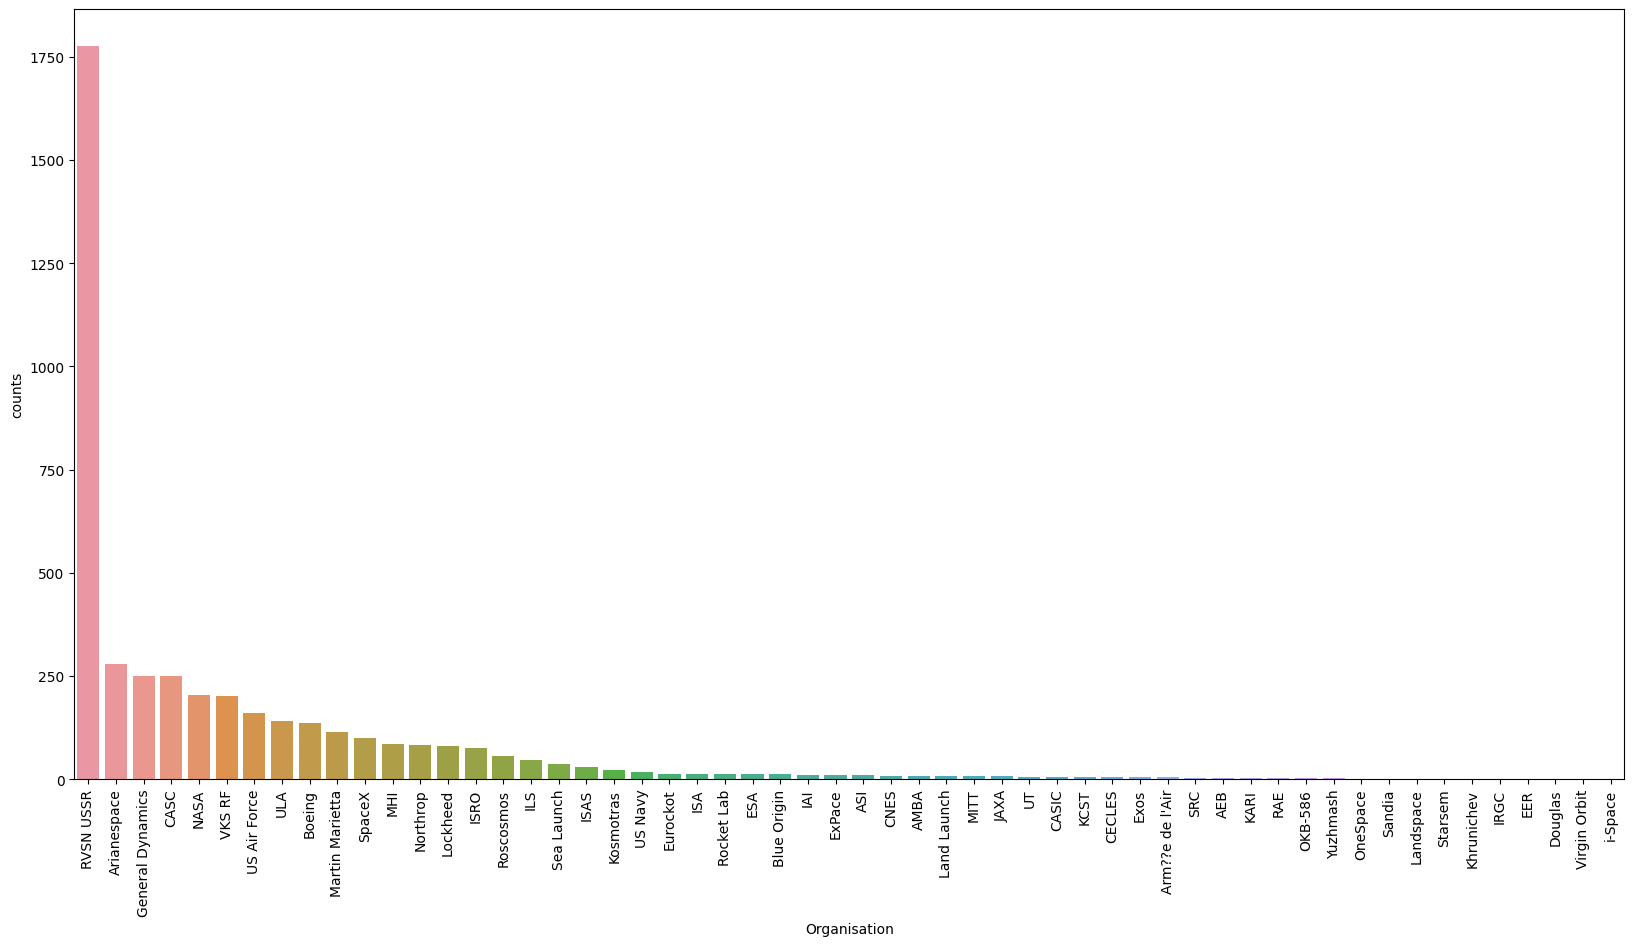

In [431]:
plt.figure(figsize=(20,10))

ax = df.groupby('Organisation')['Location'].count().sort_values(ascending=False).reset_index(name='counts')
sns.barplot(data=ax,
            x='Organisation',
            y= 'counts')
plt.xticks(rotation = 90)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [432]:
df.groupby("Rocket_Status")["Location"].count()

Rocket_Status
StatusActive      790
StatusRetired    3534
Name: Location, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [433]:
df.groupby("Mission_Status")["Location"].count()

Mission_Status
Failure               339
Partial Failure       102
Prelaunch Failure       4
Success              3879
Name: Location, dtype: int64

# How Expensive are the Launches?

Visualise the Price distribution.

<Axes: title={'center': 'Price Trend'}, xlabel='Price', ylabel='Count'>

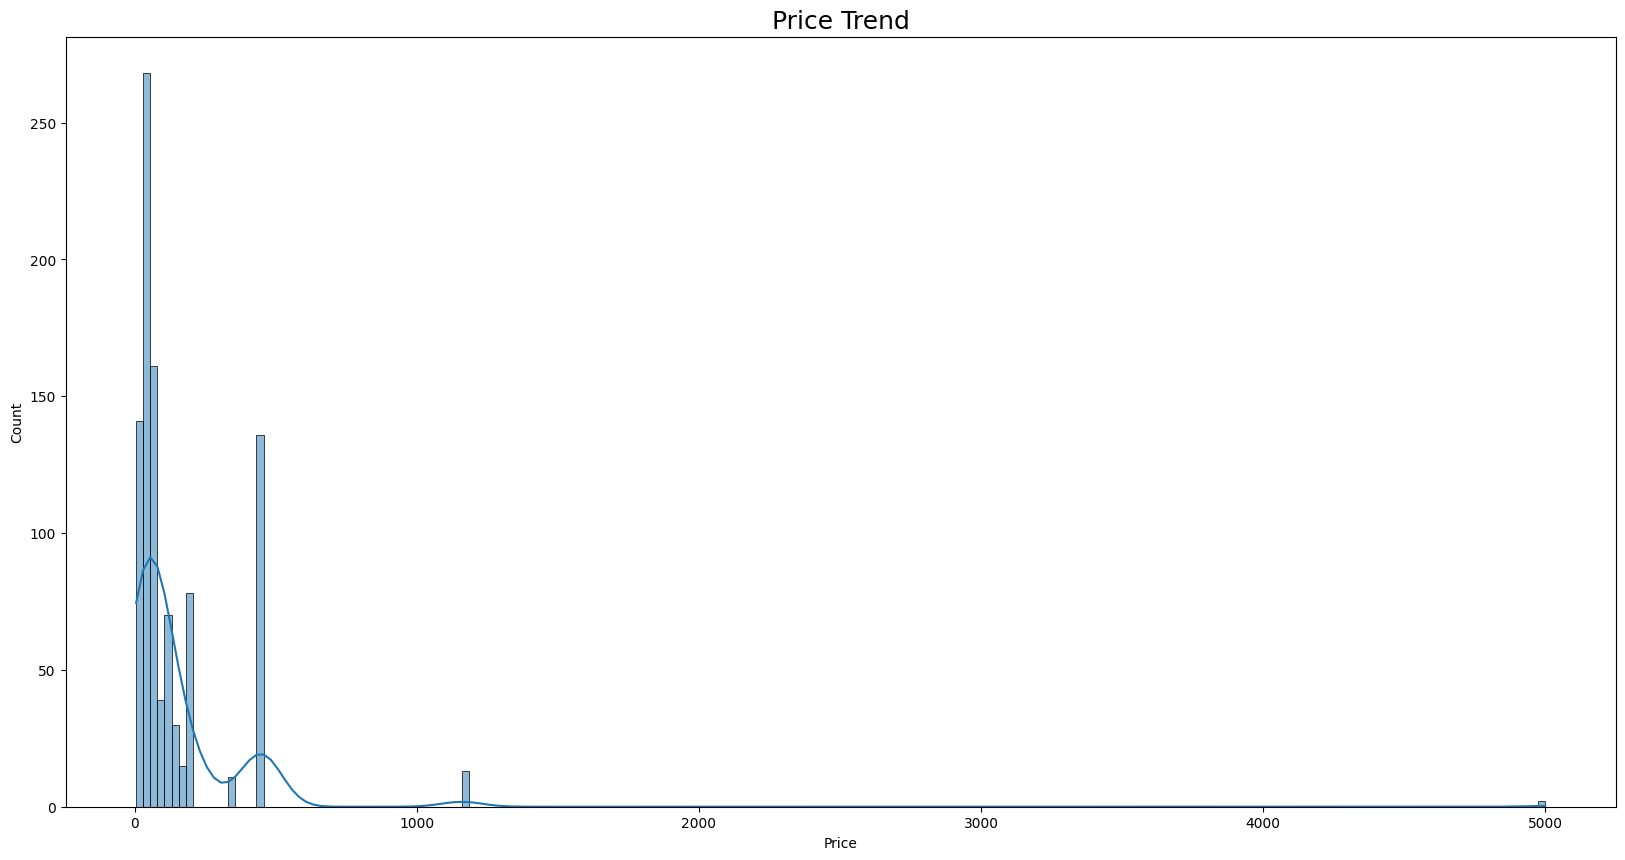

In [434]:
plt.figure(figsize=(20,10))

df['Price'].isnull().values.any()

plt.title('Price Trend', fontsize=18)

sns.histplot(data=df[df['Price'].notna()],
             x= df[df['Price'].notna()]['Price'],
             kde=True)

<Axes: title={'center': 'Organisation Prices'}, xlabel='Organisation'>

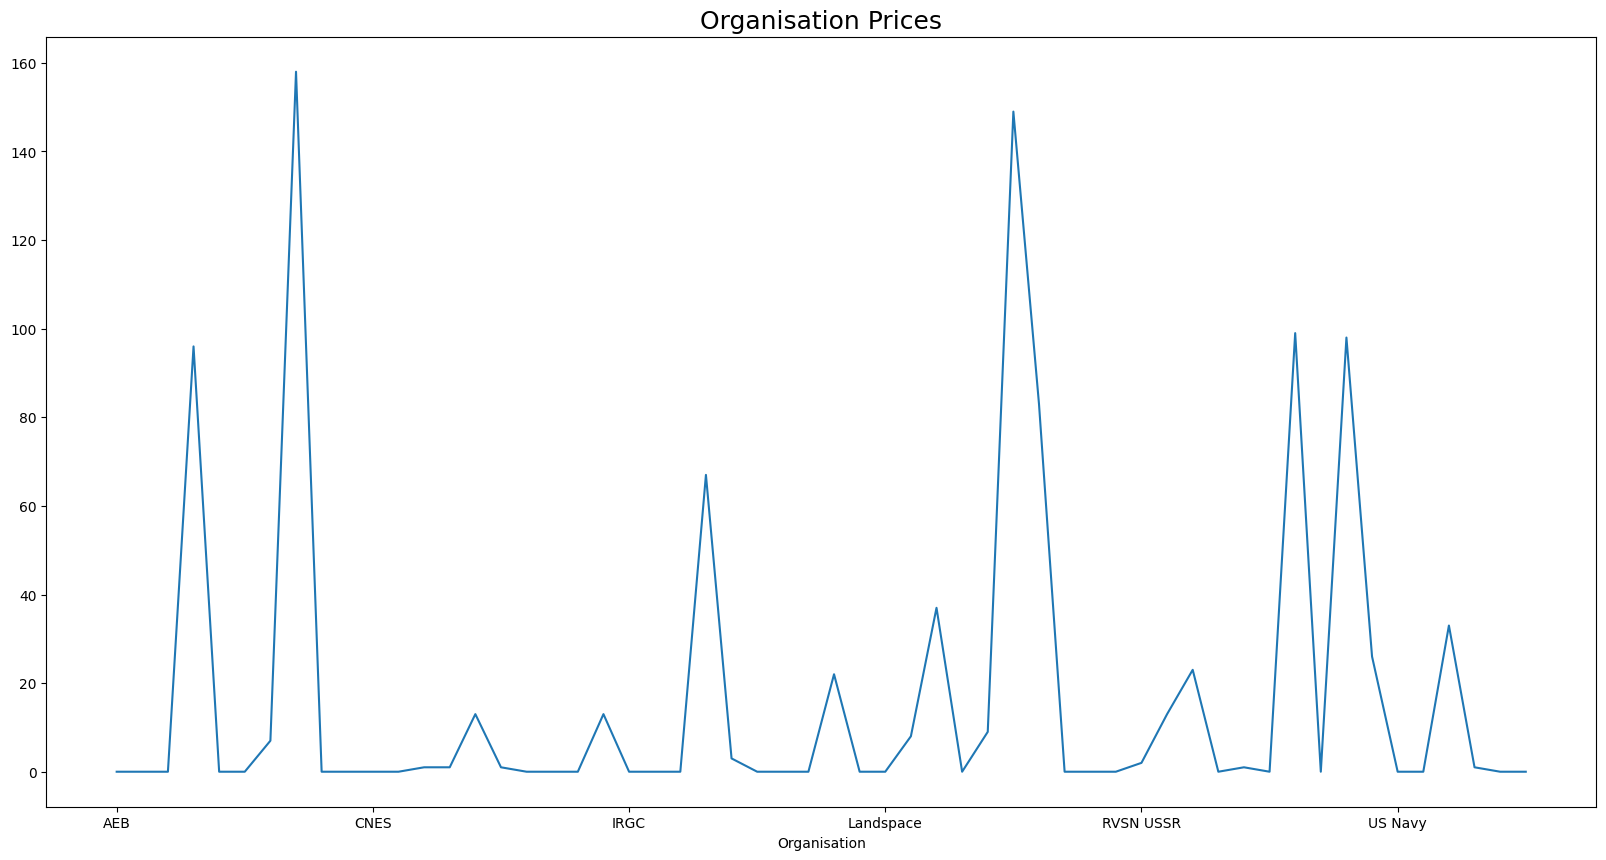

In [435]:
plt.figure(figsize=(20,10))

plt.title('Organisation Prices', fontsize=18)

df.groupby("Organisation")["Price"].count().plot()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [436]:
fig = px.sunburst(df, path=['Mission_Status', 'Location', 'Organisation'], values='Price')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

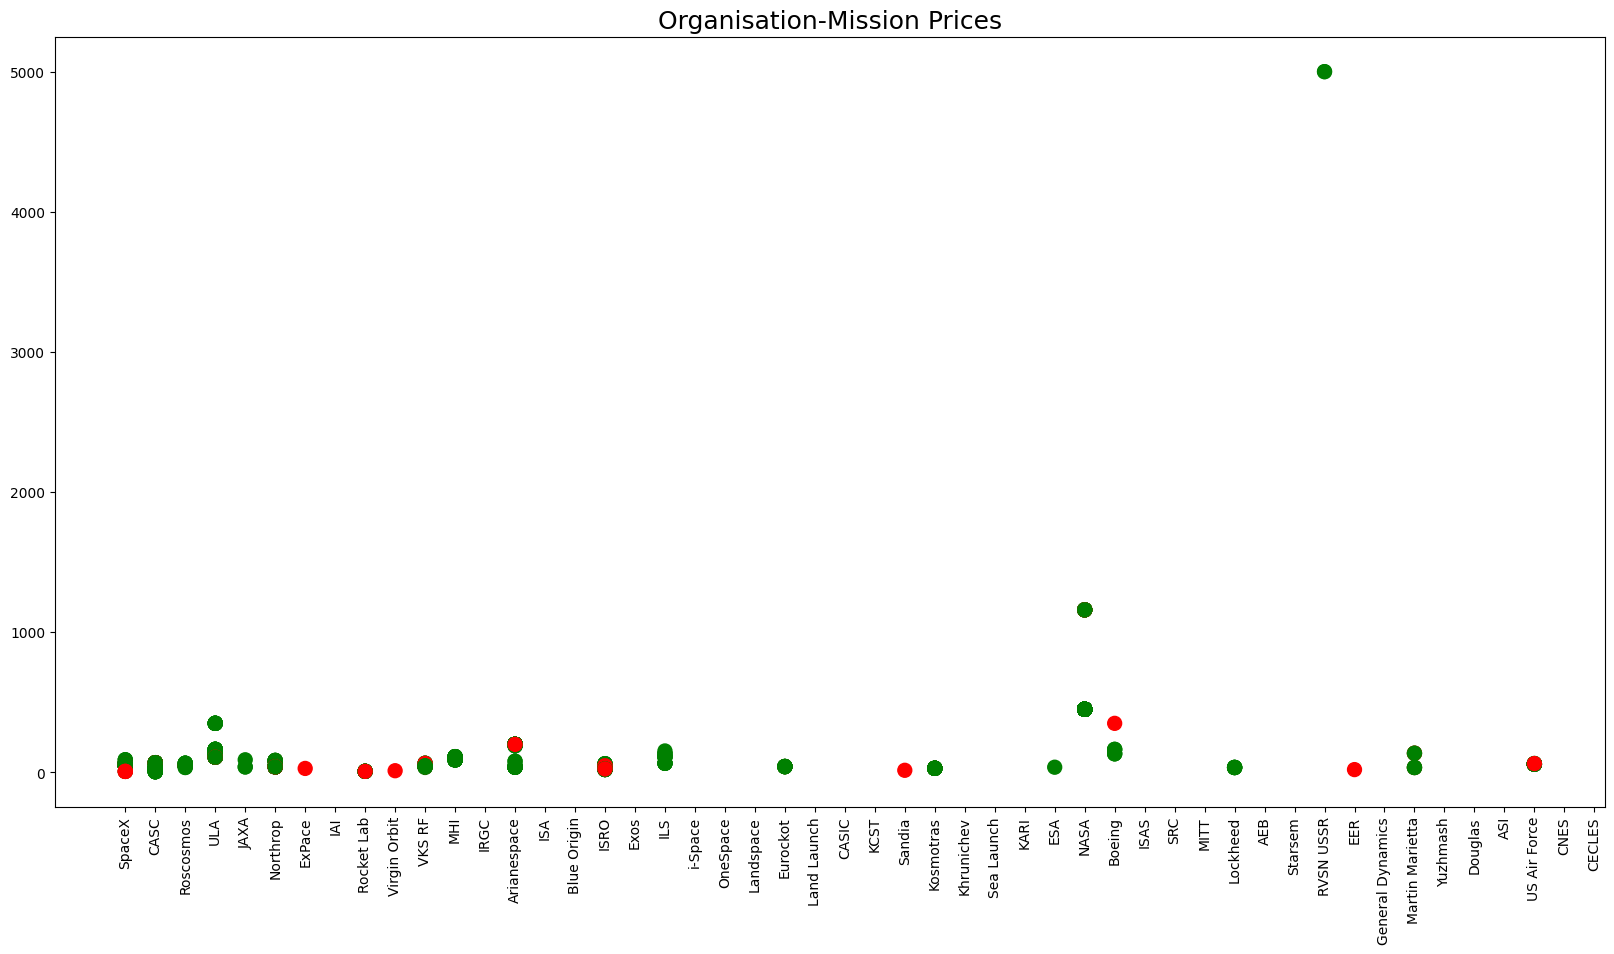

In [437]:
plt.figure(figsize=(20,10))

df.groupby(['Organisation', 'Mission_Status'])['Price'].sum().sort_values(ascending=False)
plt.title('Organisation-Mission Prices', fontsize=18)

df['colors'] = np.where(df['Mission_Status'] == 'Success', 'green', 'red')
plt.scatter(x=df['Organisation'],y=df['Price'],s=100,c=df['colors'])
plt.xticks(rotation = 90)
plt.show()

# Chart the Number of Launches per Year

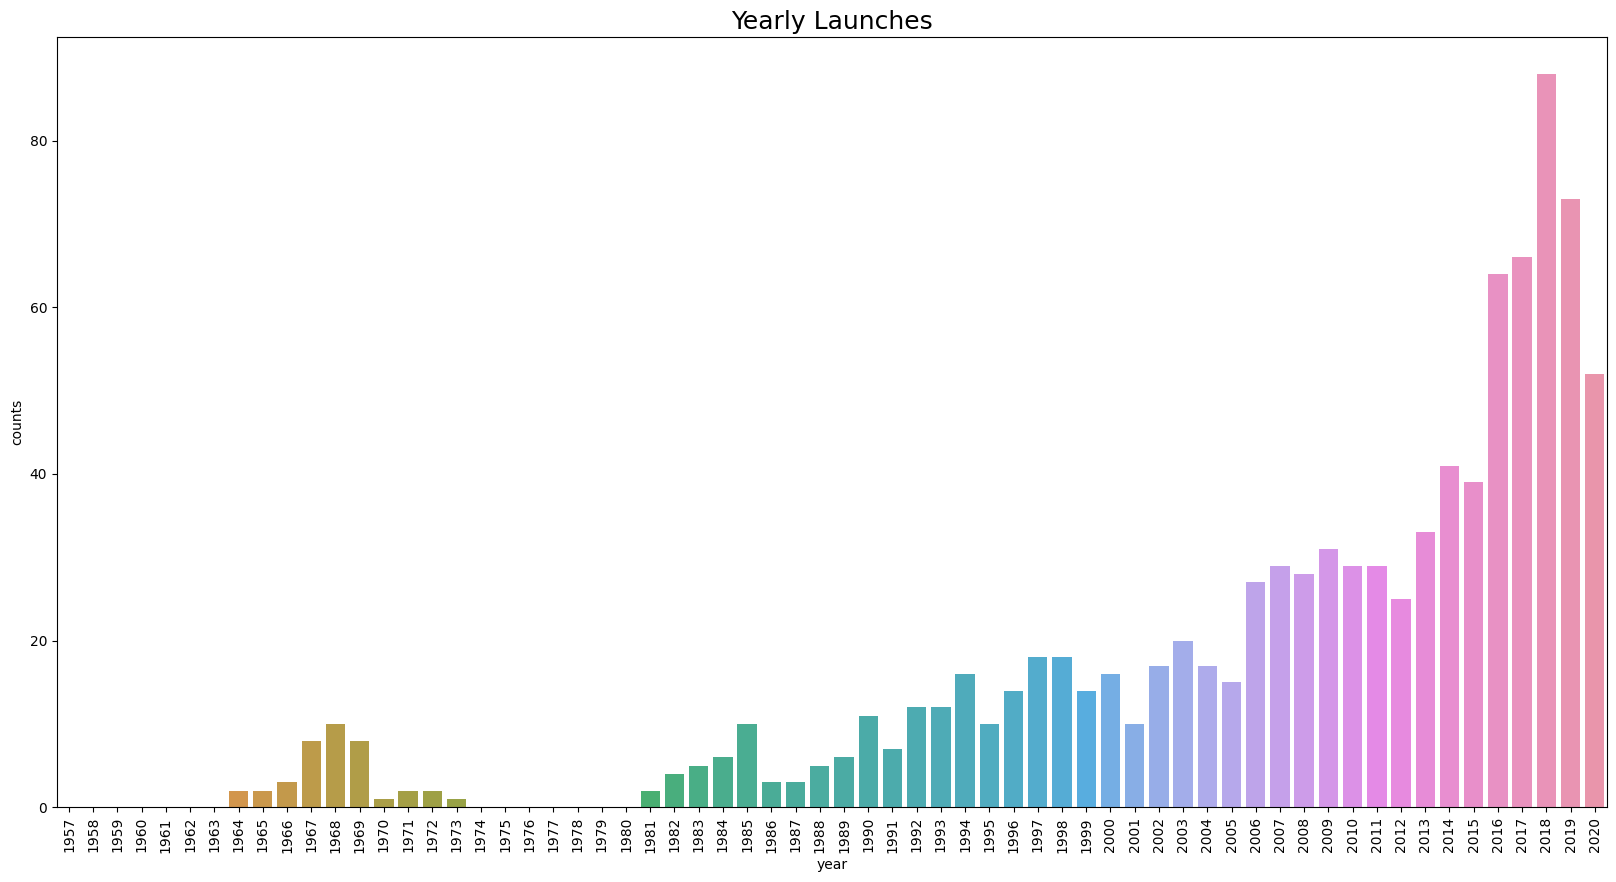

In [438]:
plt.figure(figsize=(20,10))

df['year'] = pd.DatetimeIndex(df['Date']).year

plt.title('Yearly Launches', fontsize=18)

ax = df.groupby('year')['Price'].count().reset_index(name='counts')
sns.barplot(data=ax,
            x='year',
            y='counts')
plt.xticks(rotation = 90)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

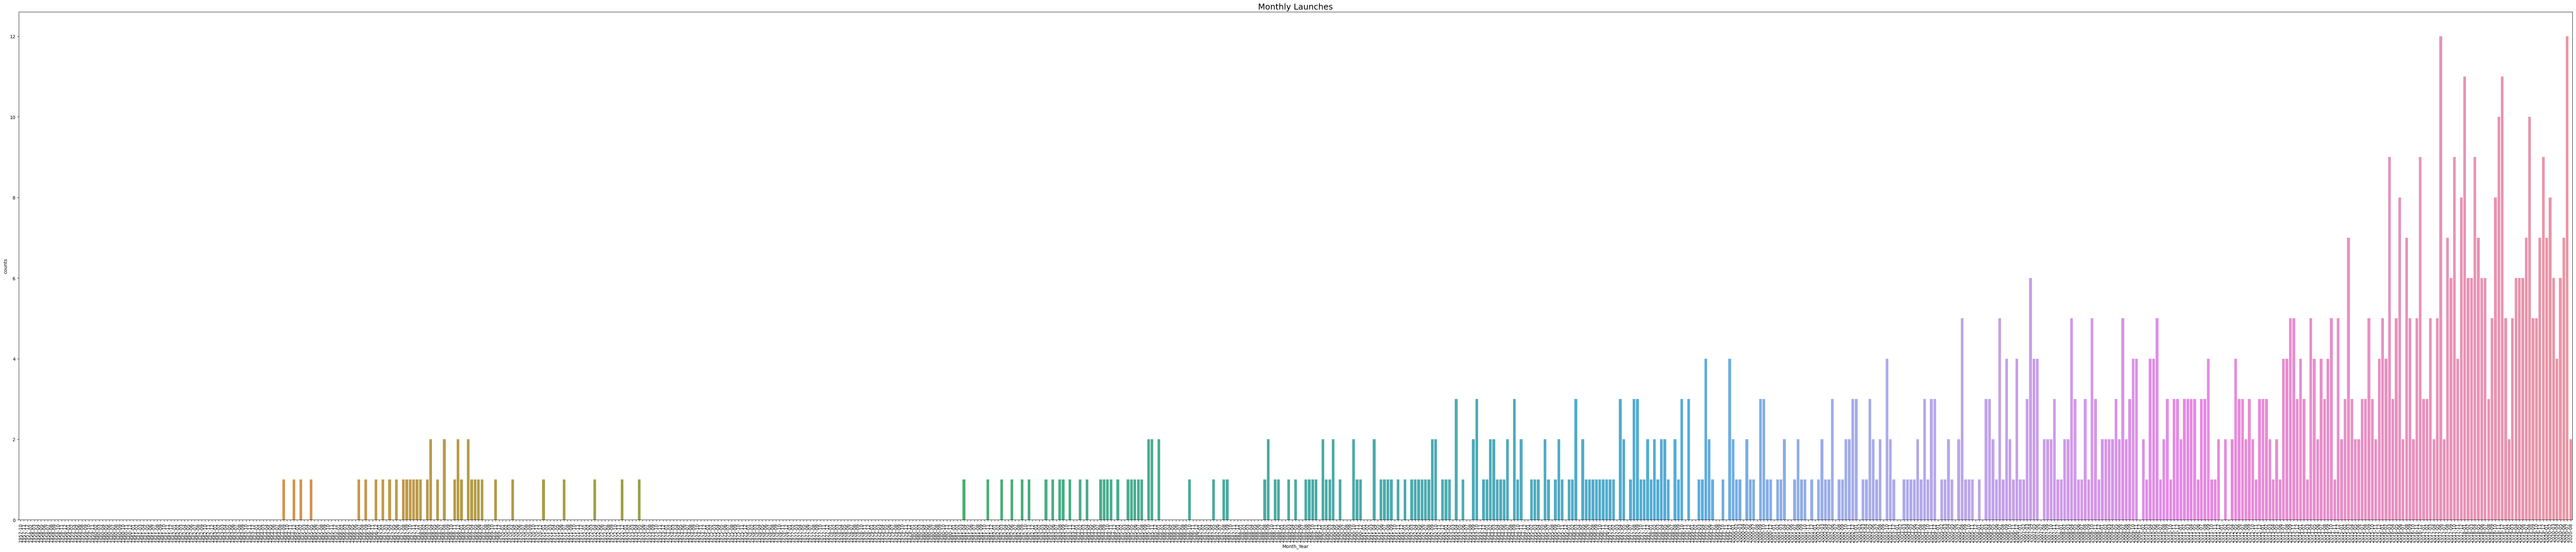

In [439]:
plt.figure(figsize=(100,20))

df['Month_Year'] = pd.DatetimeIndex(df['Date']).to_period('M')
plt.title('Monthly Launches', fontsize=18)

ax = df.groupby('Month_Year')['Price'].count().reset_index(name='counts')
sns.barplot(data=ax,
            x='Month_Year',
            y='counts')
plt.xticks(rotation = 90)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [440]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month'].mode()

0    12
Name: Month, dtype: int64

# How has the Launch Price varied Over Time?


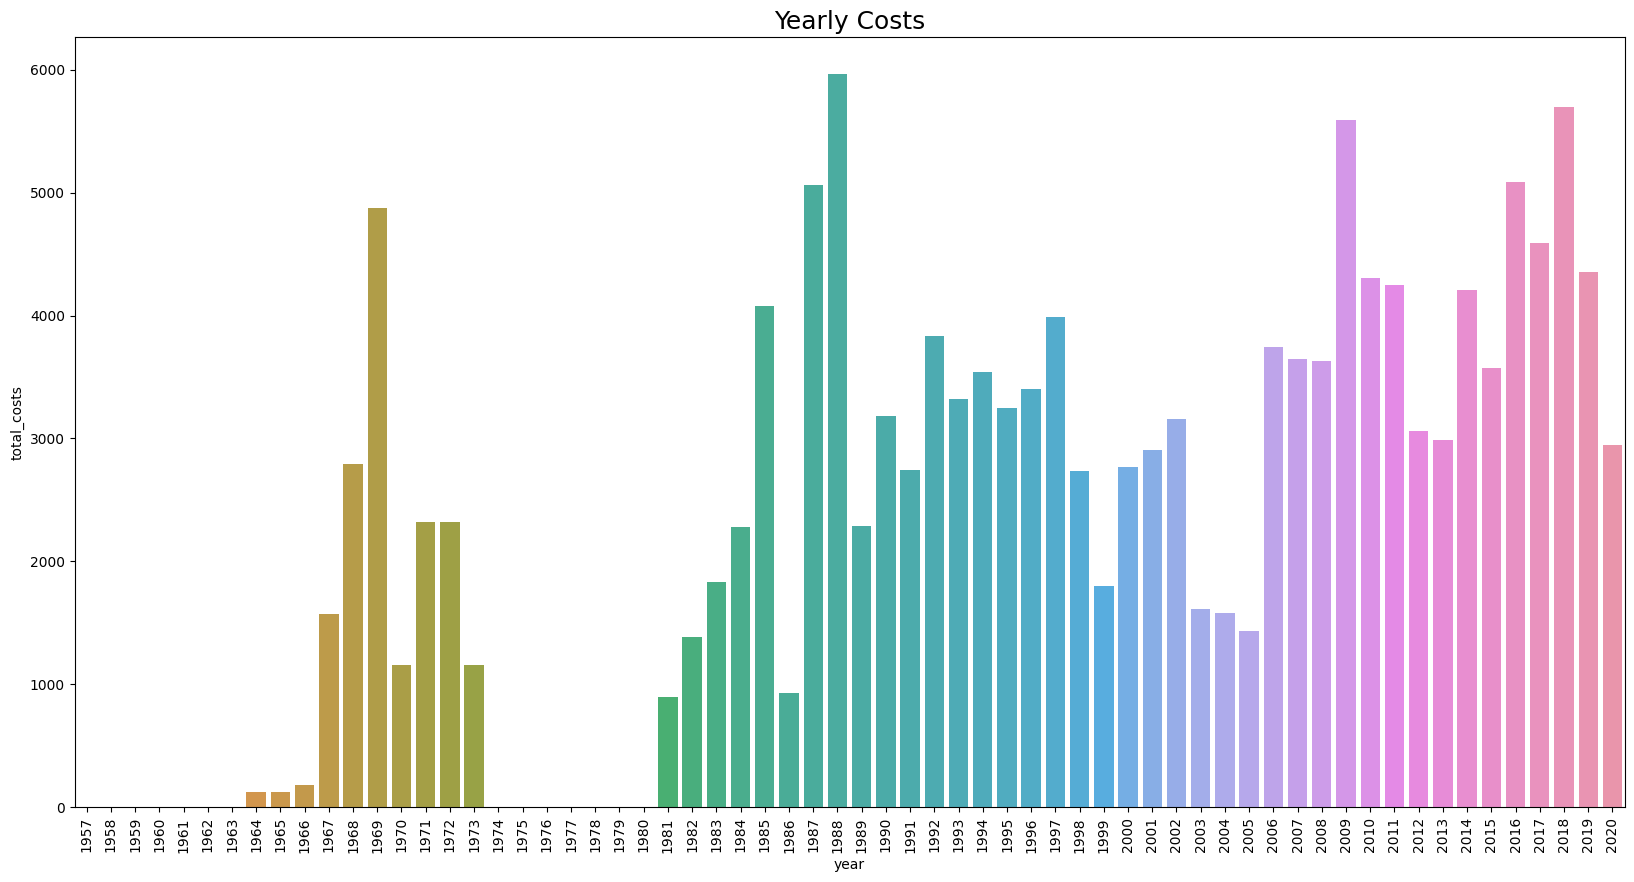

In [441]:
plt.figure(figsize=(20,10))

plt.title('Yearly Costs', fontsize=18)

ax = df.groupby('year')['Price'].sum().reset_index(name='total_costs')
sns.barplot(data=ax,
            x='year',
            y='total_costs')
plt.xticks(rotation = 90)
plt.show()

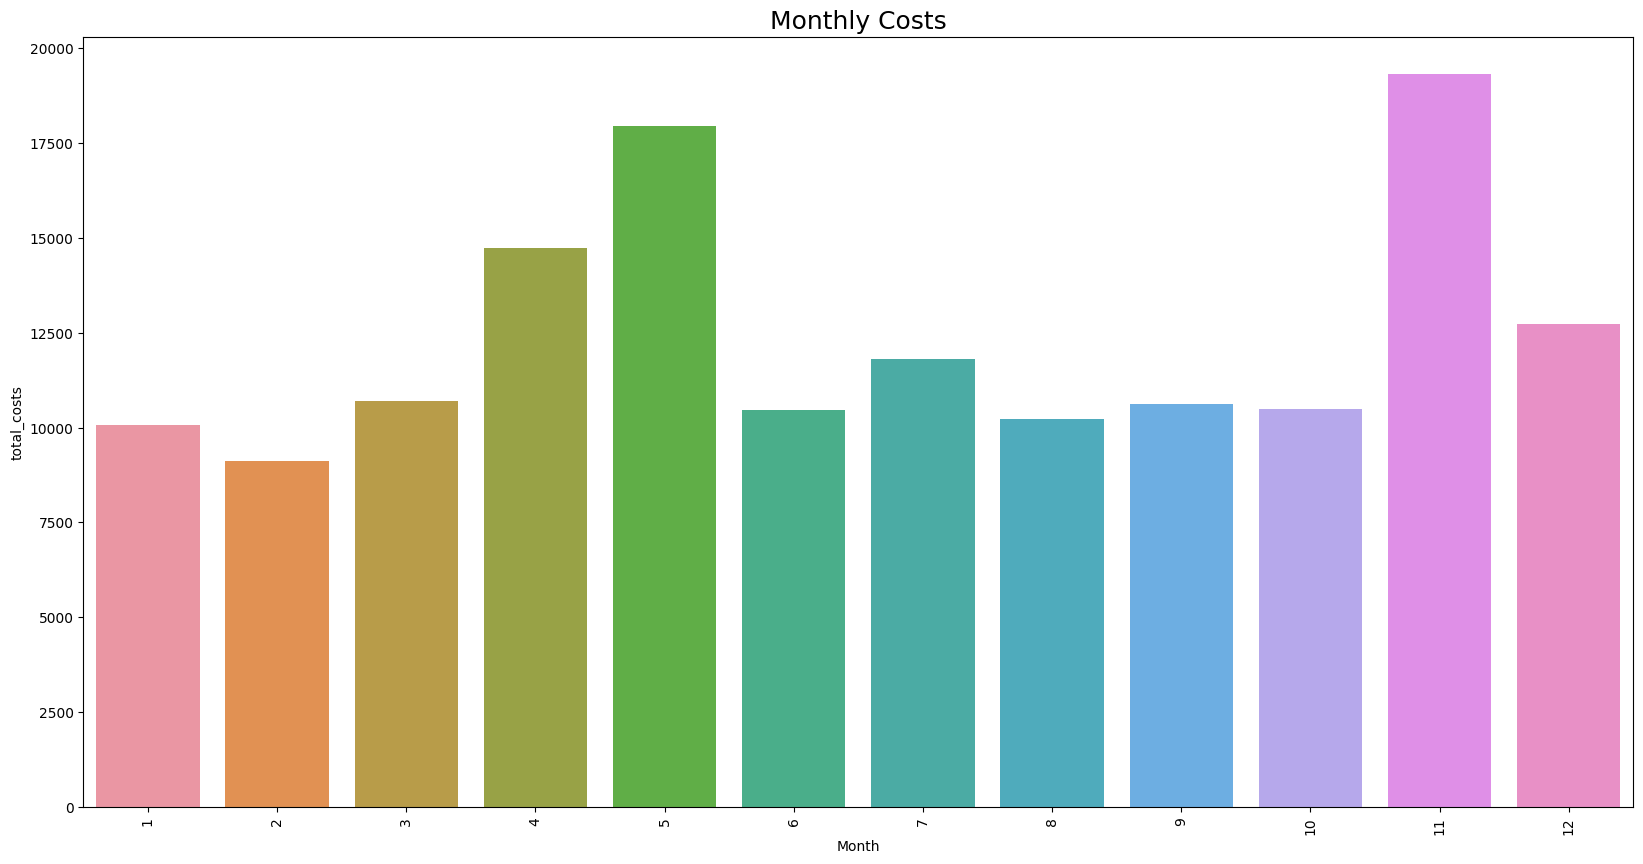

In [442]:
plt.figure(figsize=(20, 10))

plt.title('Monthly Costs', fontsize=18)

ax = df.groupby('Month')['Price'].sum().reset_index(name='total_costs')
sns.barplot(data=ax, x="Month", y="total_costs")
plt.xticks(rotation = 90)
plt.show()

# Chart the Number of Launches over Time by the Organisations.


<Axes: xlabel='year', ylabel='counts'>

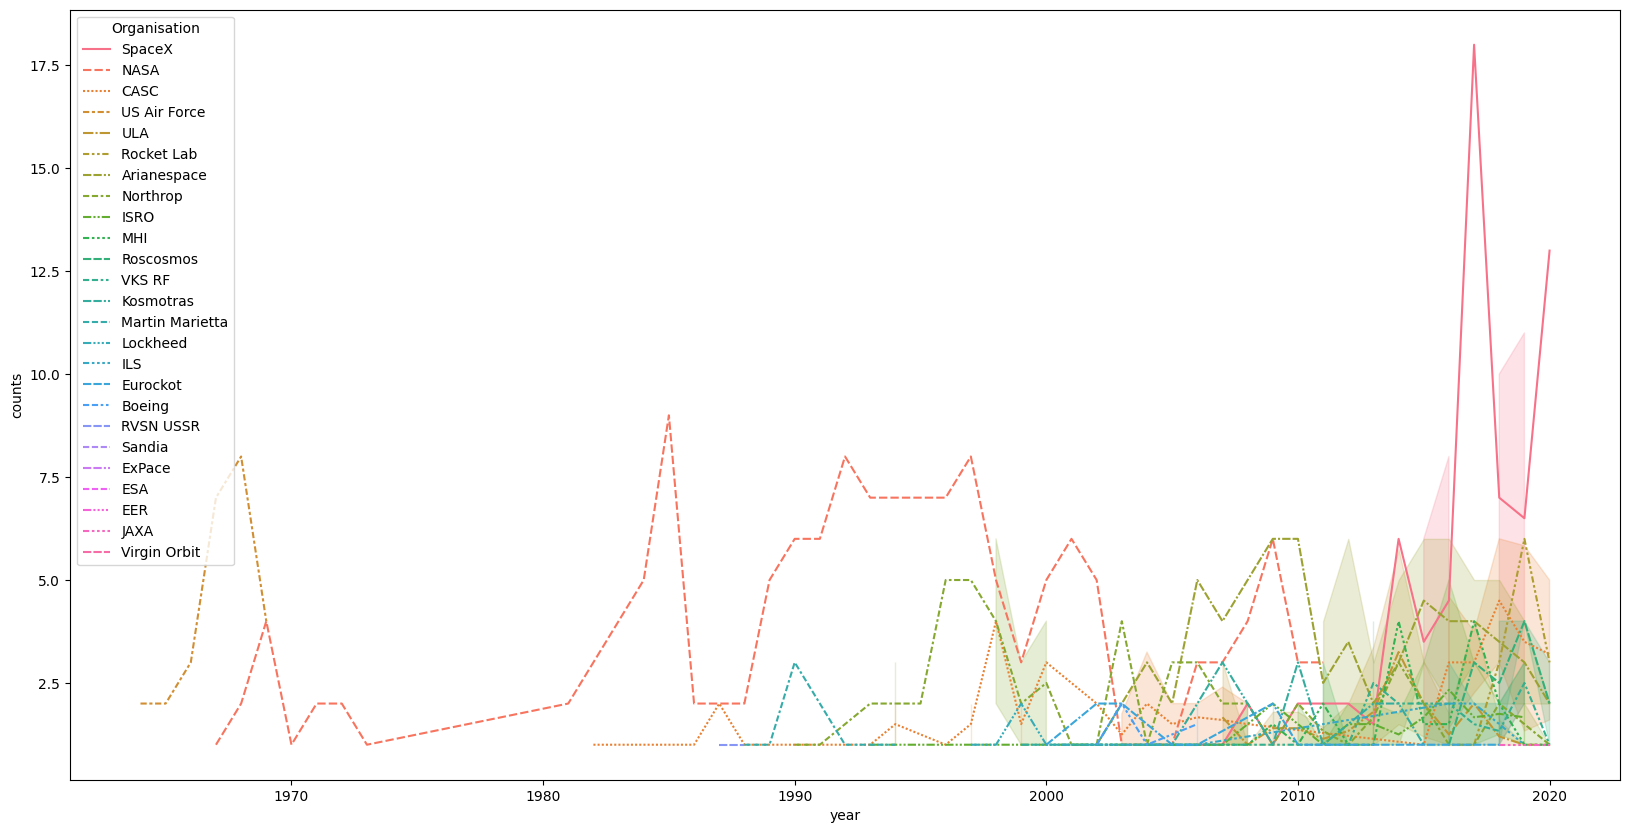

In [443]:
plt.figure(figsize=(20, 10))

organ_costs = df.groupby(['Organisation','year', 'Price'])['Price'].count().sort_values(ascending=False).reset_index(name='counts')
sns.lineplot(data=organ_costs, x="year", y="counts", hue="Organisation", style="Organisation")

# Cold War Space Race:

The cold war lasted from the start of the dataset up until 1991.

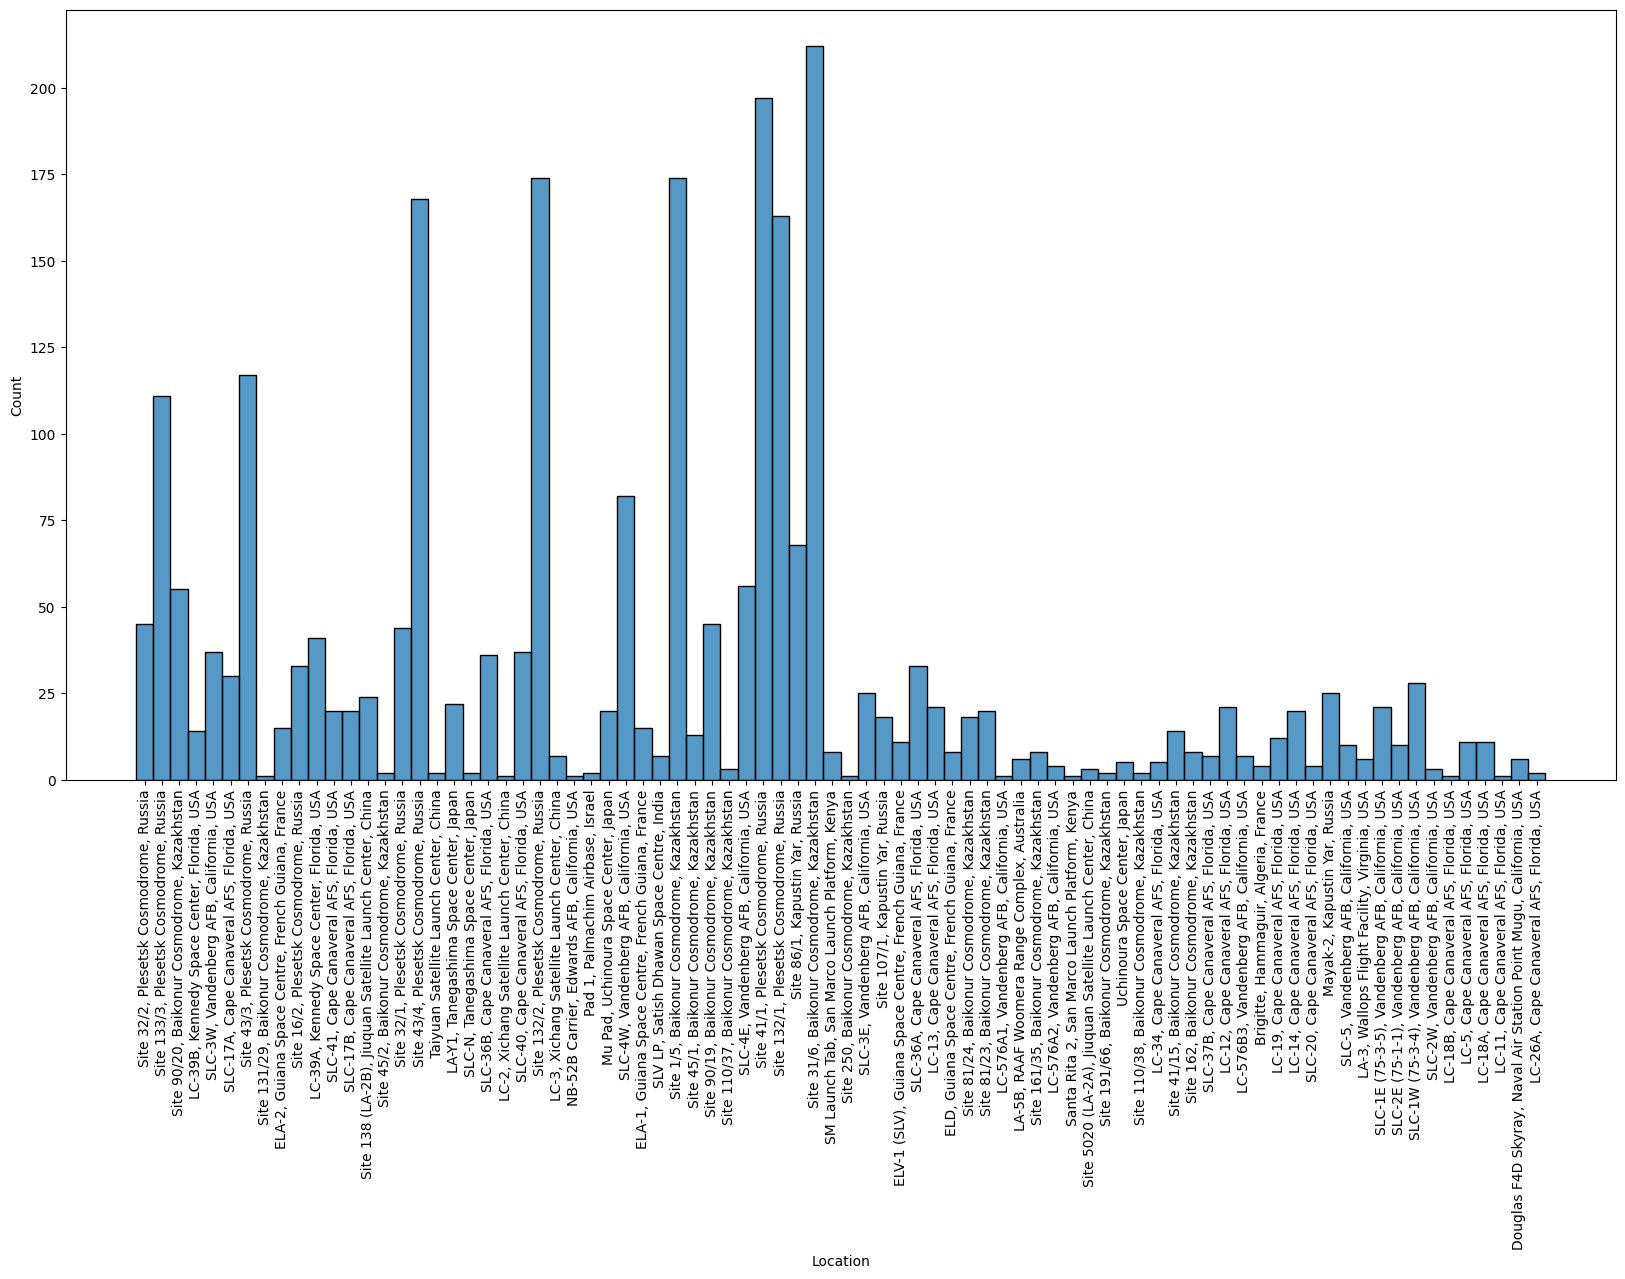

In [444]:
plt.figure(figsize=(20, 10))

cold_war = df[df['Date'] < '1991']
sns.histplot(data=cold_war,
            x='Location')

plt.xticks(rotation = 90)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

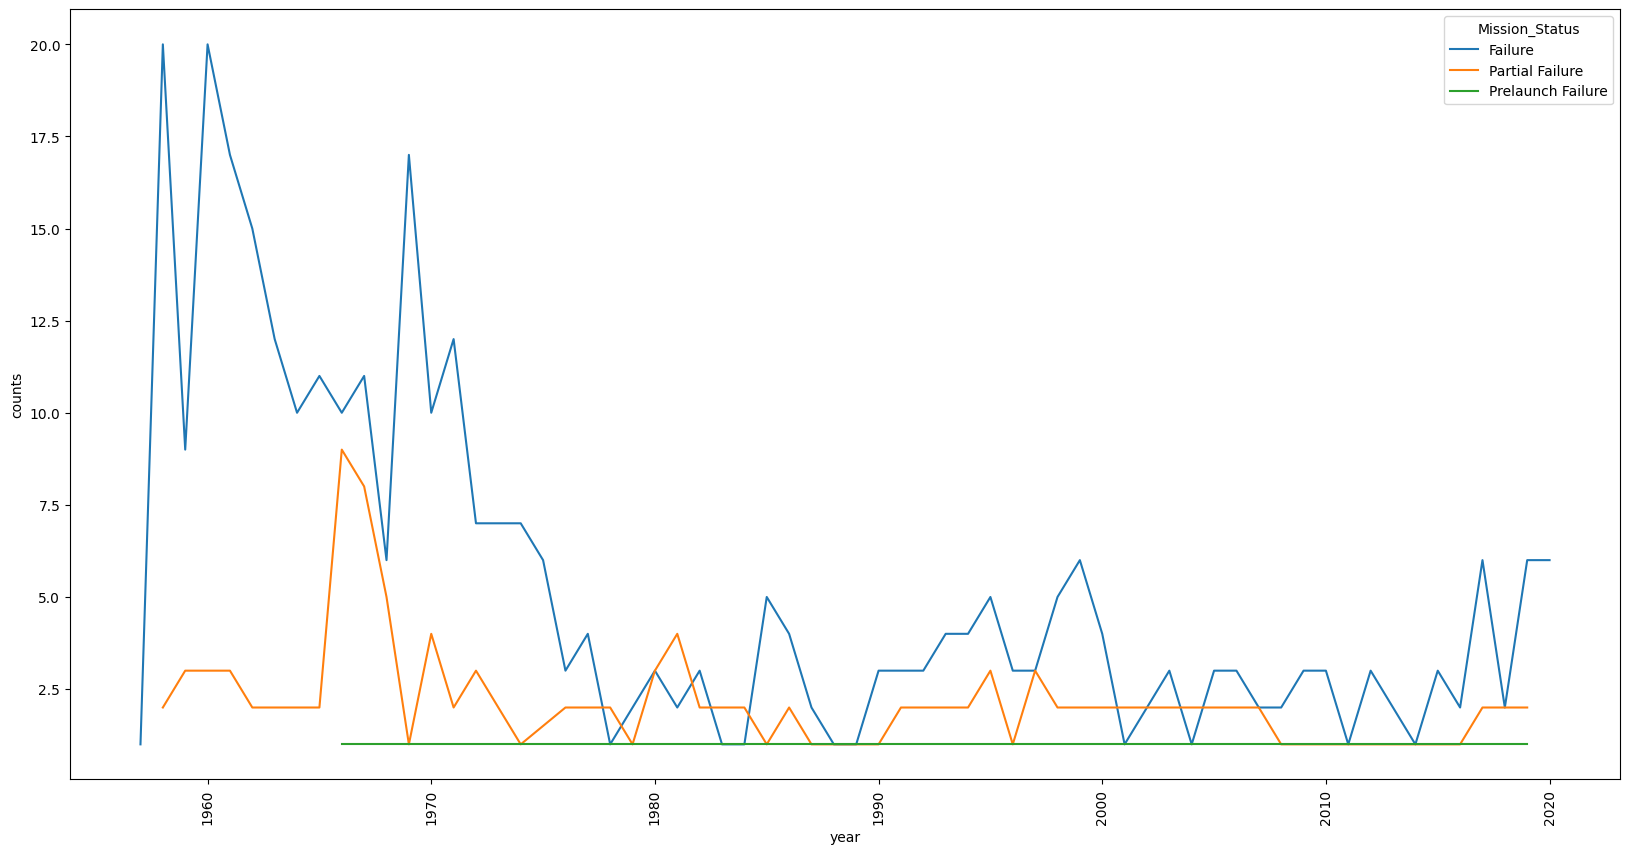

In [445]:
plt.figure(figsize=(20, 10))

failurs = df[df['Mission_Status'] != 'Success']
ax = failurs.groupby(['Mission_Status', 'year'])['year'].count().sort_values(ascending=False).reset_index(name='counts')
sns.lineplot(data=ax,
            x='year',
            y='counts',
            hue='Mission_Status')

plt.xticks(rotation = 90)
plt.show()